In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
#reading file
bikes=pd.read_csv('day (1).csv')

In [3]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike sharing dataframe

In [4]:
bikes.shape

(730, 16)

In [5]:
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# STEP 1: Cleaning data

Dropping unnecessary columns from data set

In [8]:
# Dropping instant column since it has only row number
bikes.drop(['instant'],axis=1,inplace=True)
# Dropping dteday since it has month,weekday and year column of 2018 and 2019
bikes.drop(['dteday'],axis=1,inplace=True)
# Dropping casual and registered column, already we have cnt column sum of casual and registered column
bikes.drop(['casual'],axis=1,inplace=True)
bikes.drop(['registered'],axis=1,inplace=True)

In [9]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
bikes_new=bikes.copy()

In [11]:
# Replacing numbers with categorical names for season,weathersit,mnth,weekday,yr
bikes_new.season.replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)
bikes_new.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace=True)
bikes_new.mnth=bikes.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
bikes_new.weekday=bikes.weekday.replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})


In [12]:
bikes_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
bikes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [14]:
bikes_new.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

There is no null values

### Handling outliers

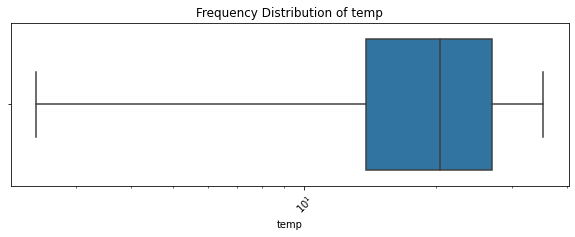

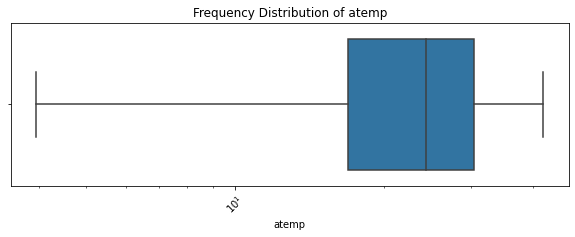

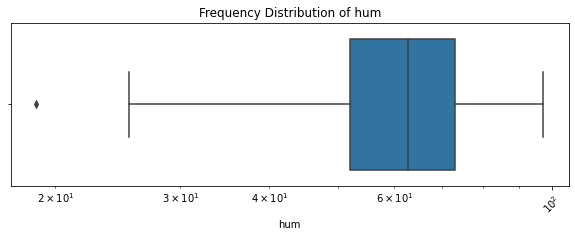

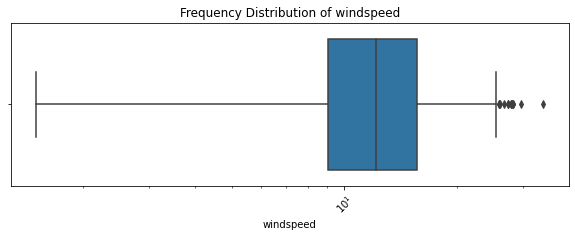

In [15]:
outlier_columns=['temp', 'atemp', 'hum', 'windspeed']
for i in outlier_columns:
    plt.figure(figsize=([10,3]))
    sns.boxplot(bikes_new[i])
    plt.xlabel(i)
    plt.title("Frequency Distribution of "+i)
    plt.xticks(rotation=45)
    plt.xscale('log')
    plt.show()

Insights:
- There is no outliers to be handled.

# STEP 2: VISUALIZING THE DATA

#### Visualising Continous Variables


Let's make a pairplot of all the numeric variables

In [16]:
bikes_continous=['temp','atemp','hum','windspeed','cnt']
bikes_categorical=['season','yr','mnth','holiday','weekday','workingday','weathersit']

<Figure size 1080x1440 with 0 Axes>

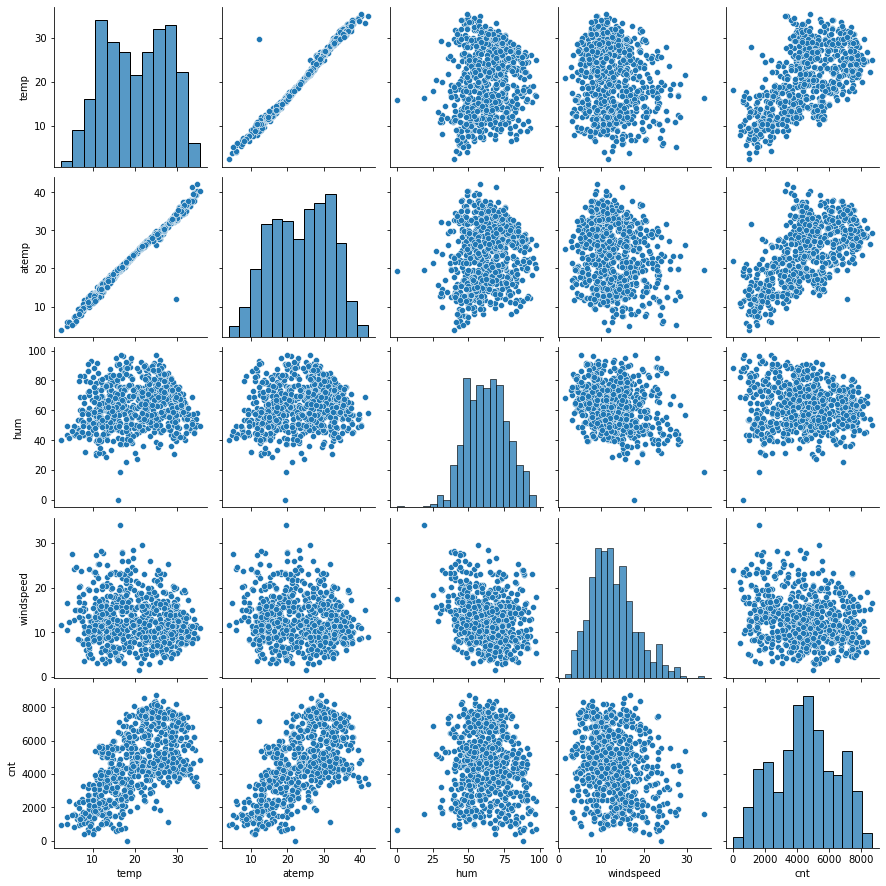

In [17]:
plt.figure(figsize=(15,20))
sns.pairplot(data=bikes_new,vars=bikes_continous)
plt.show()

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. 

#### Visualising categorical Variables


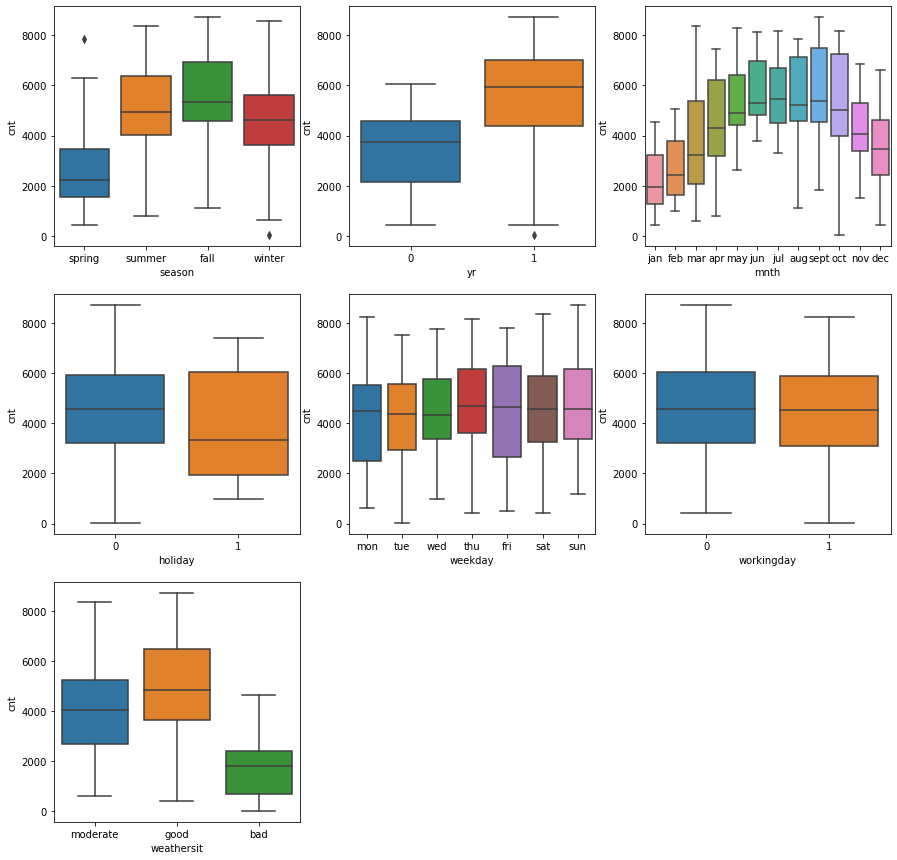

In [18]:
plt.figure(figsize=(15,15))
for i in enumerate(bikes_categorical):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikes_new,x=i[1],y='cnt')
plt.show()

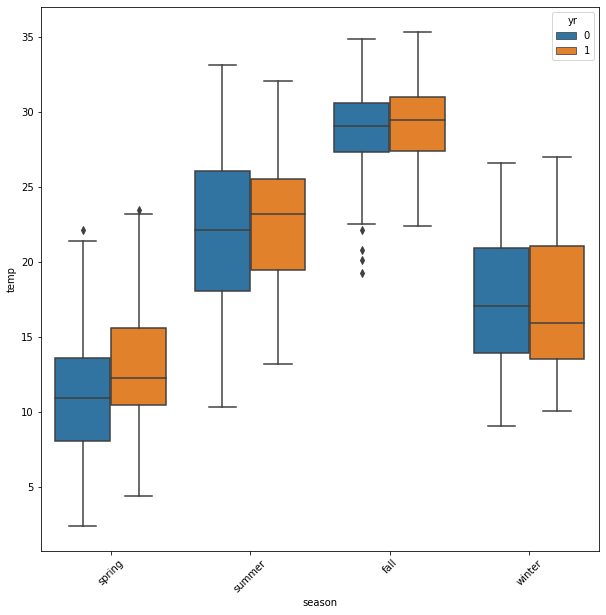

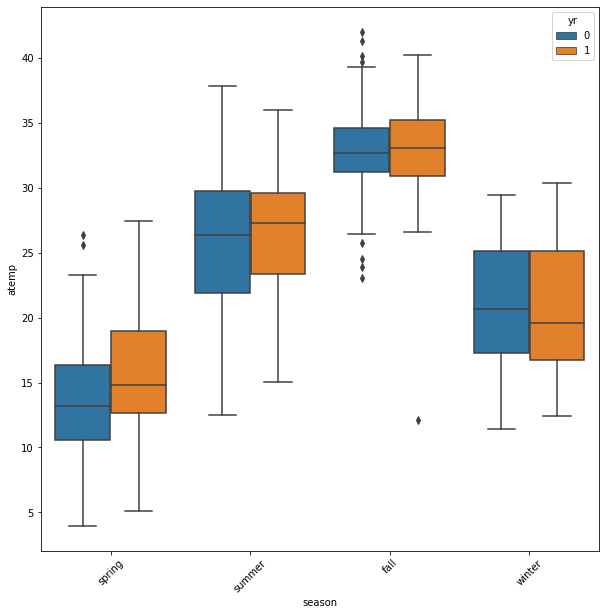

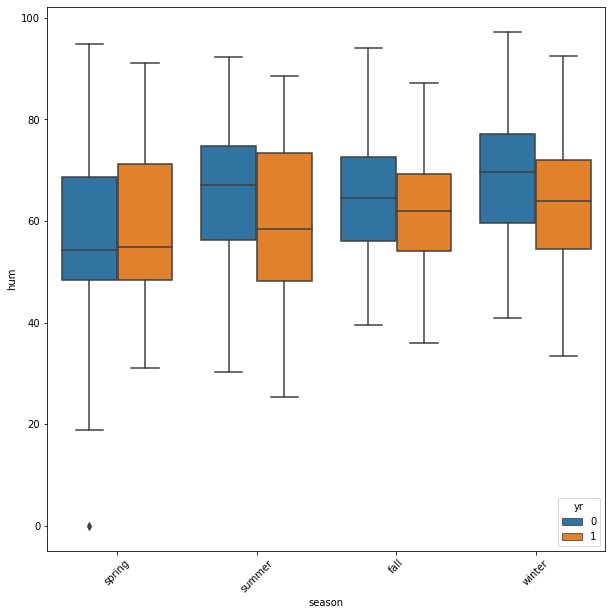

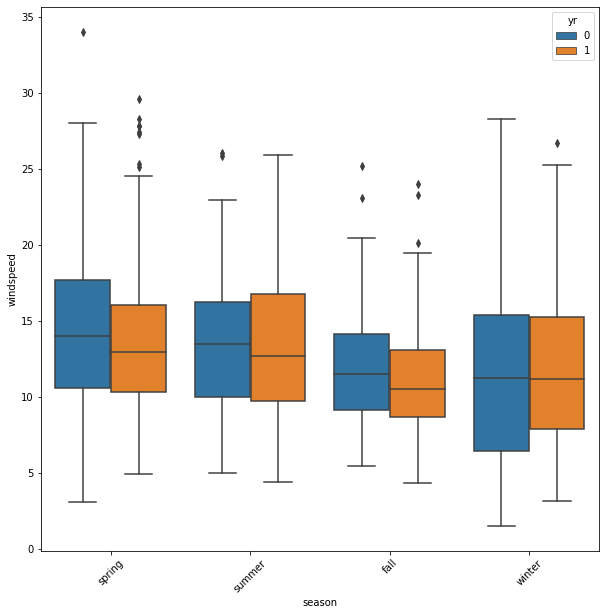

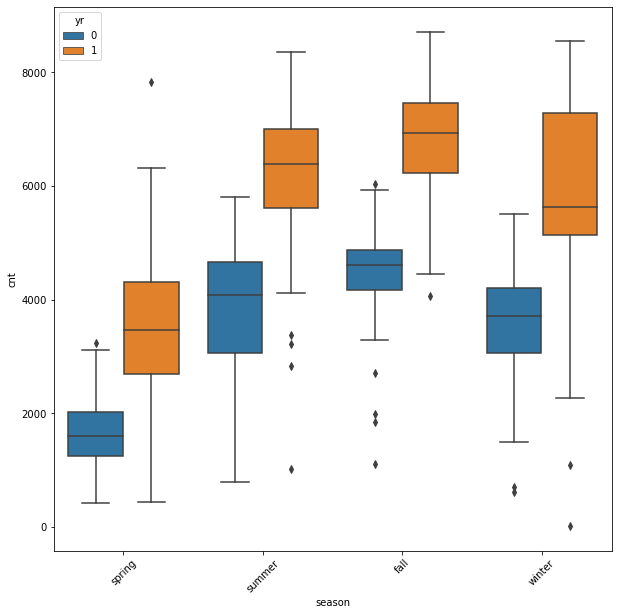

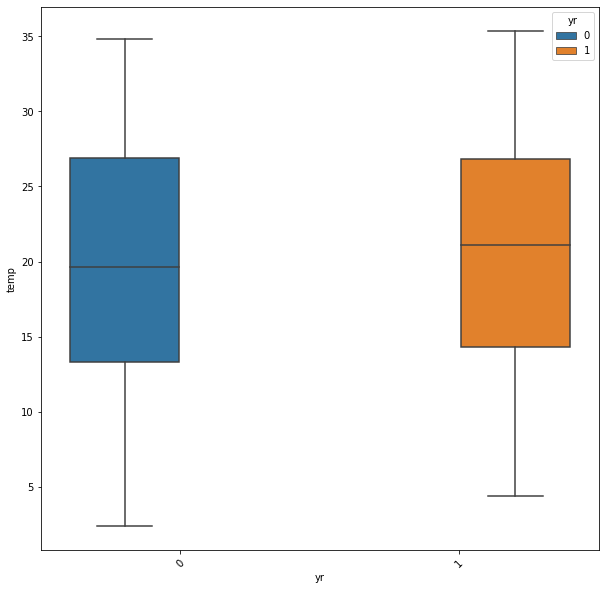

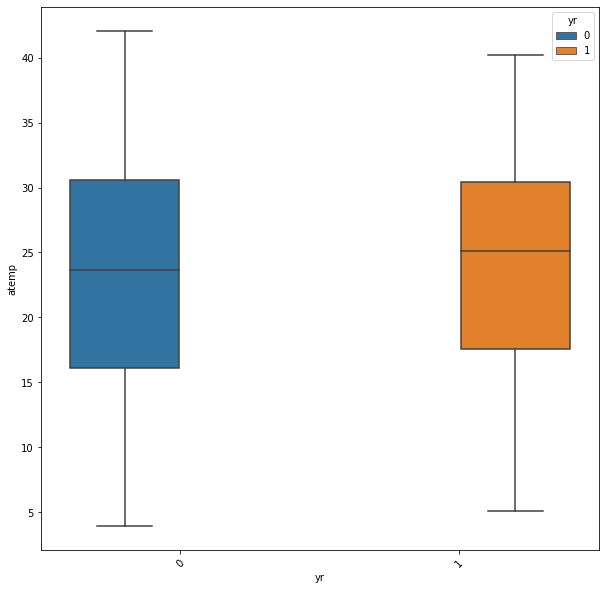

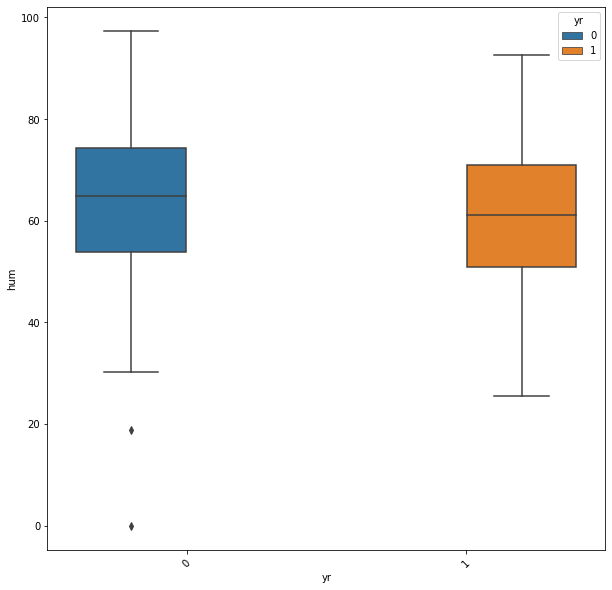

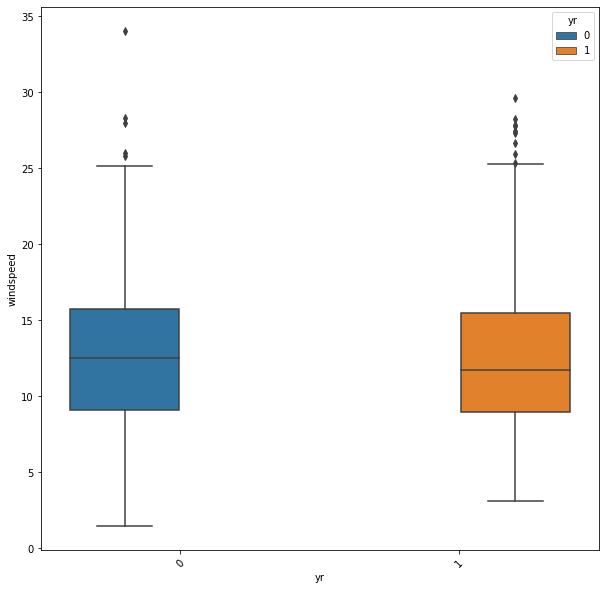

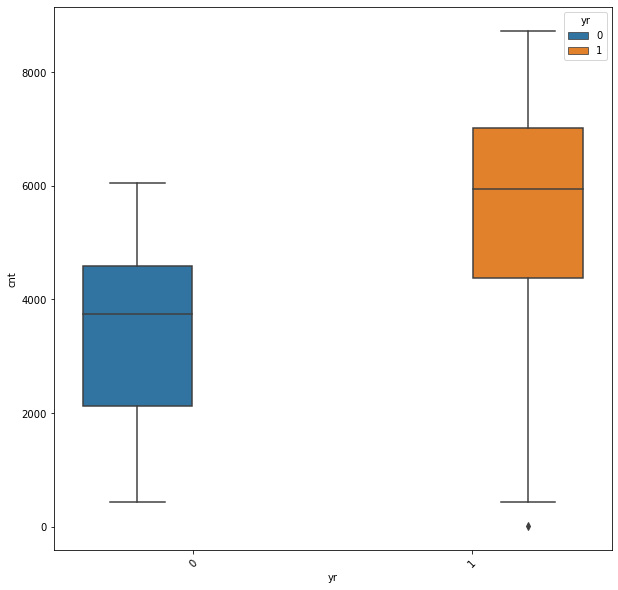

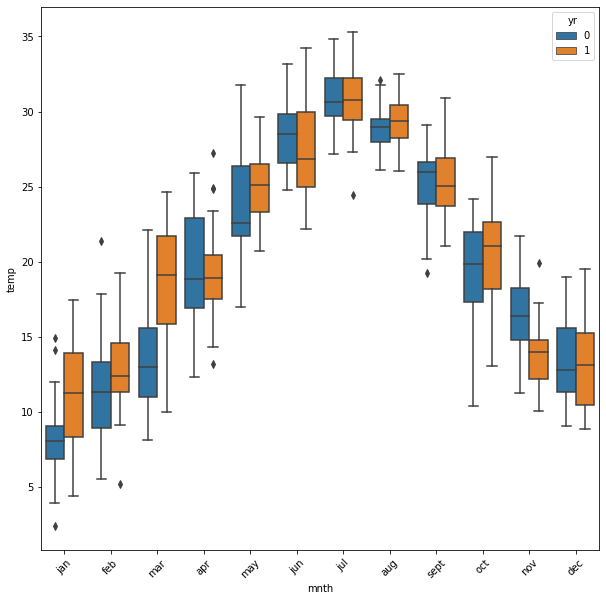

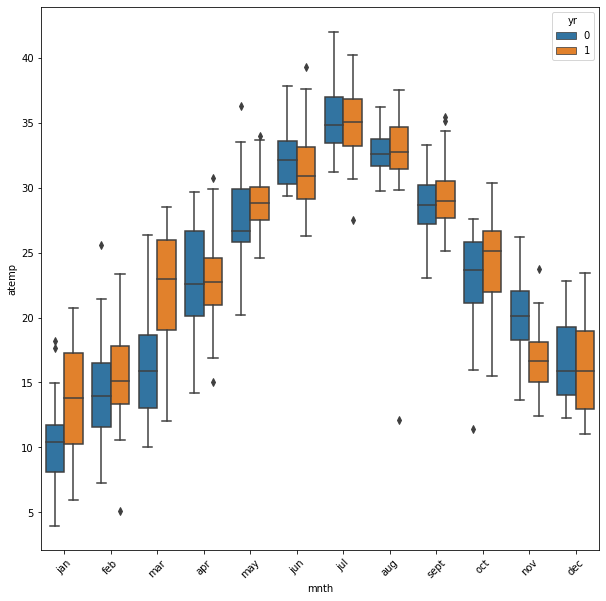

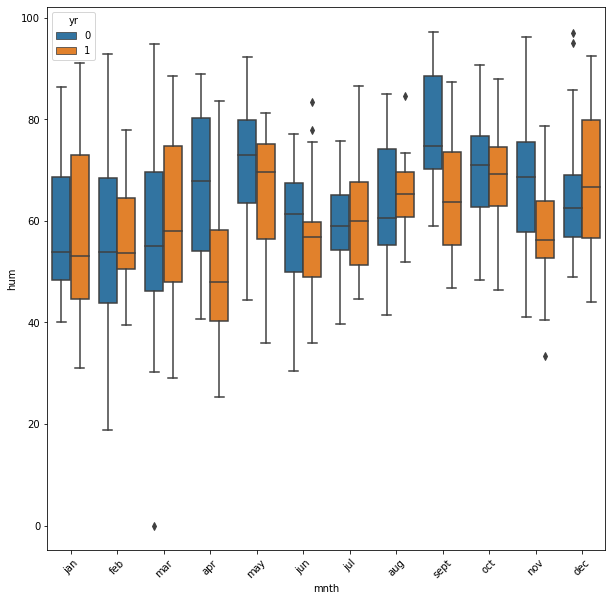

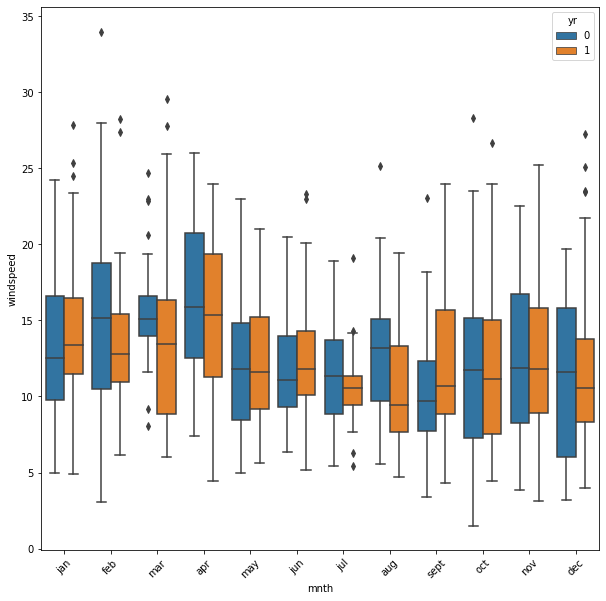

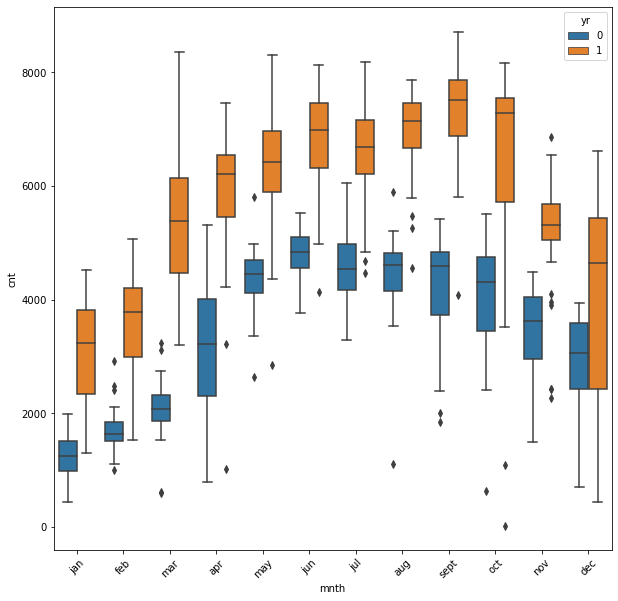

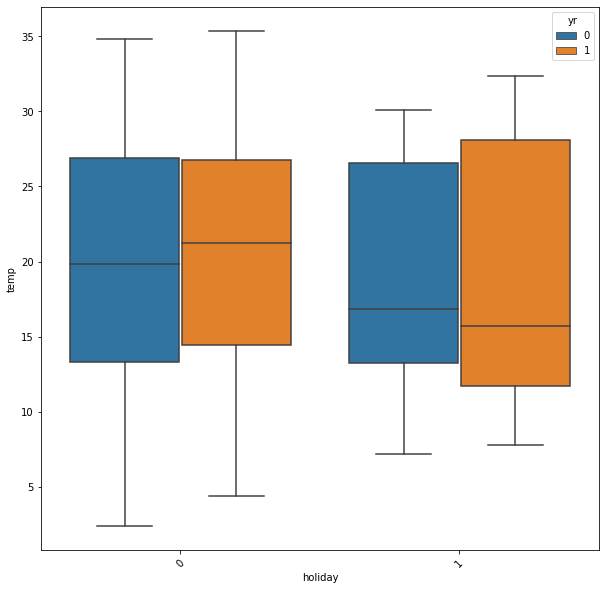

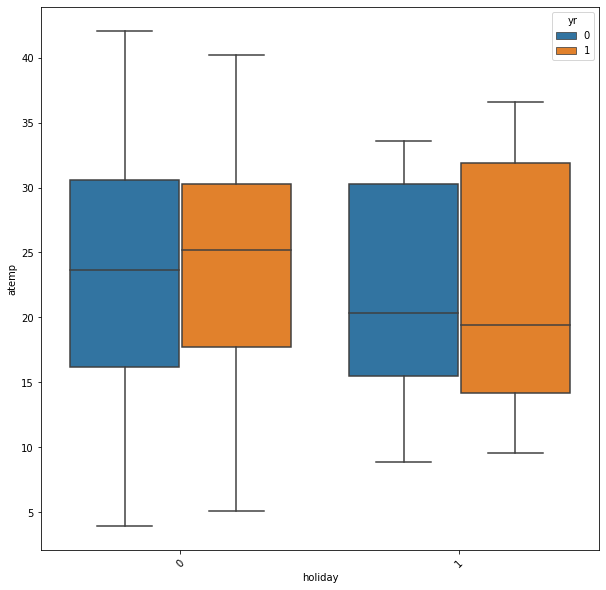

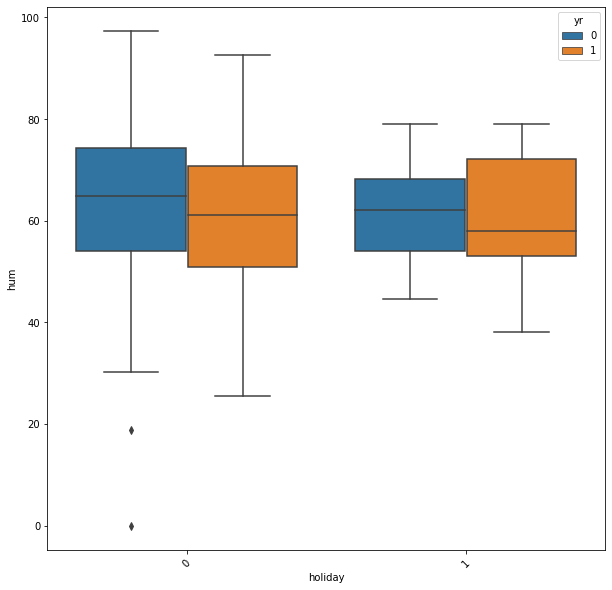

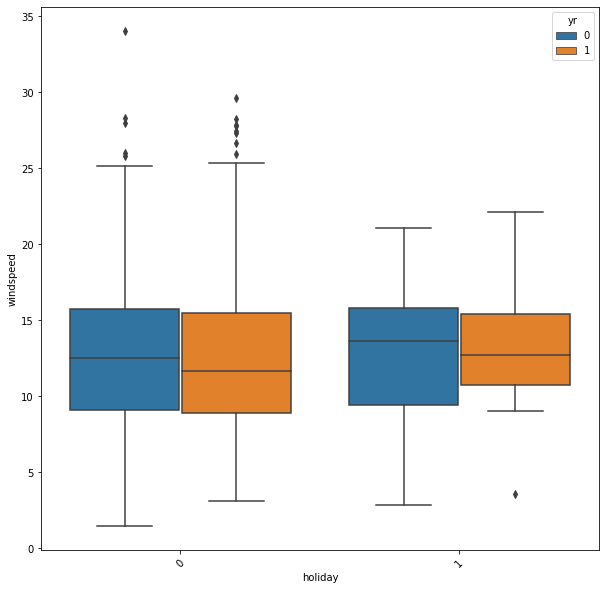

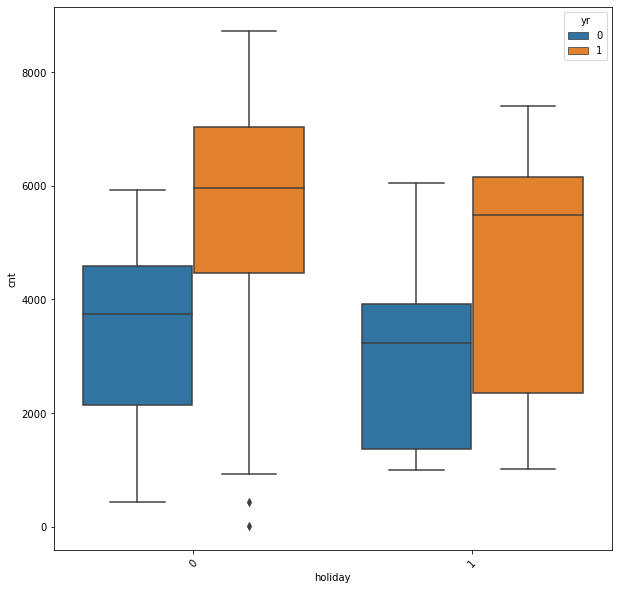

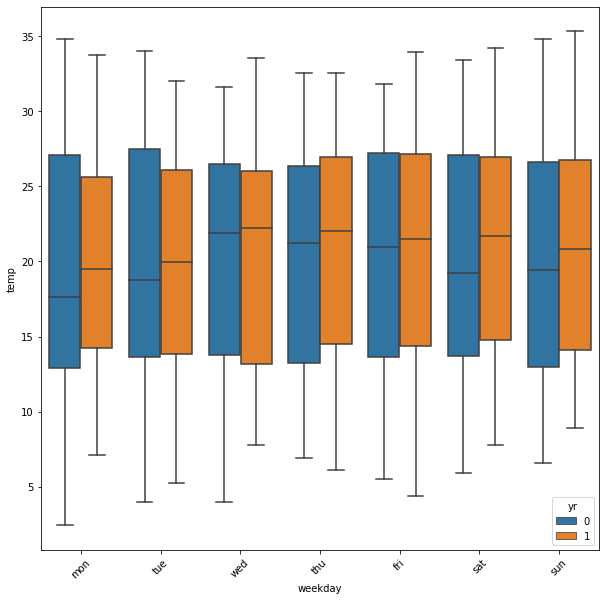

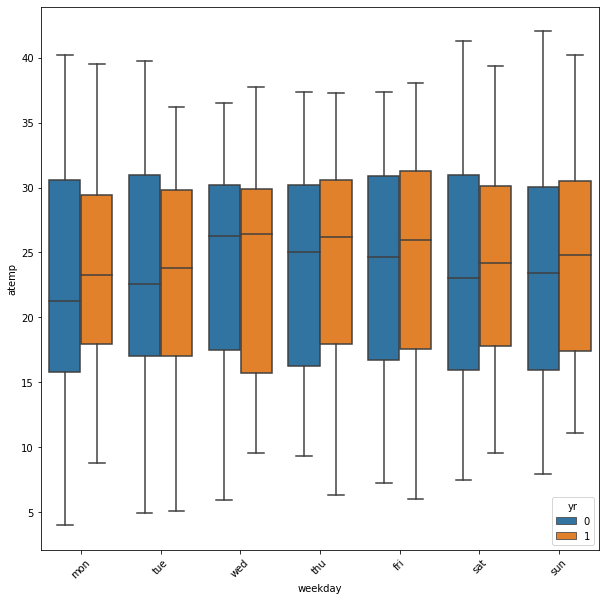

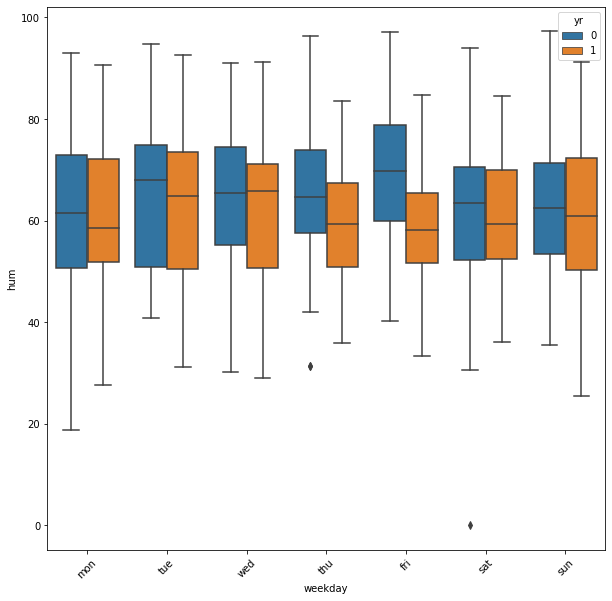

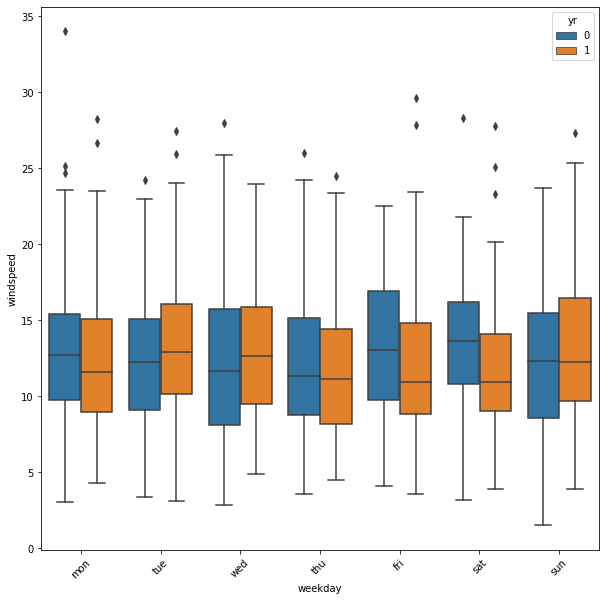

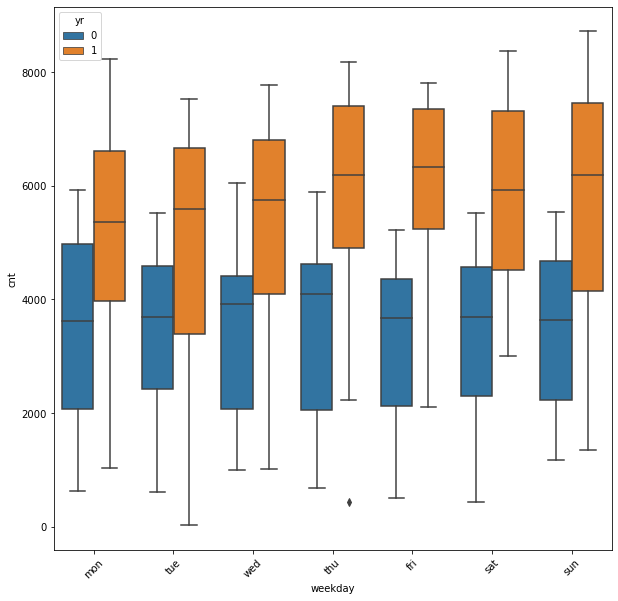

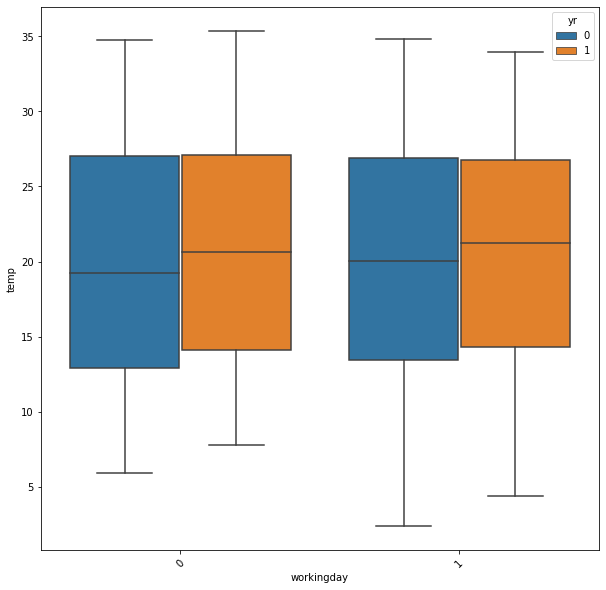

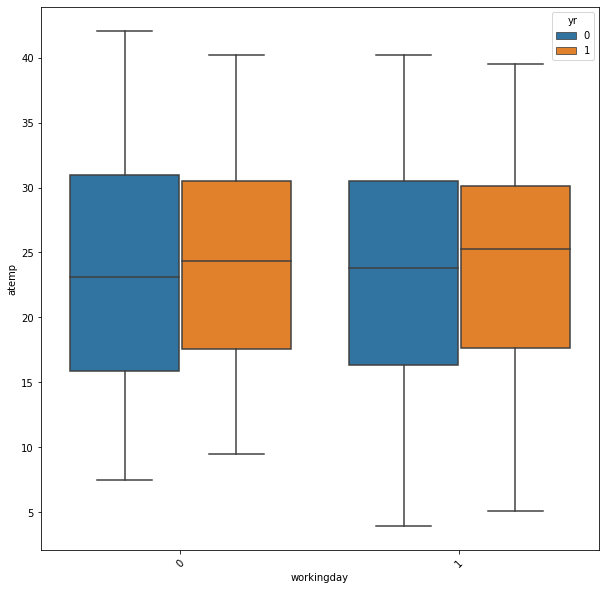

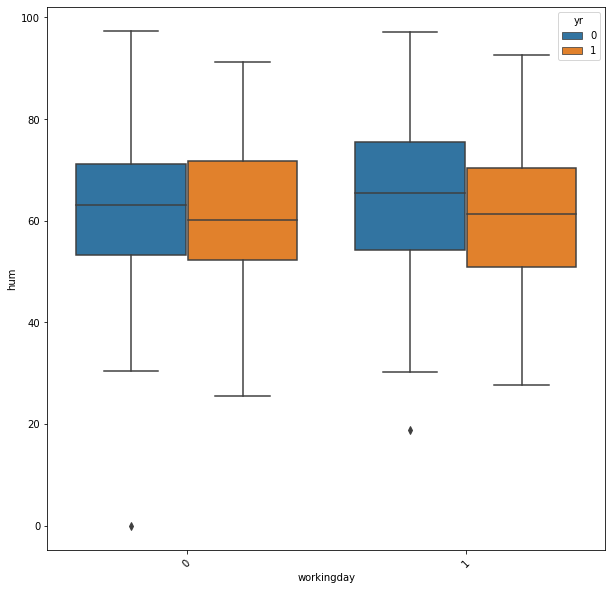

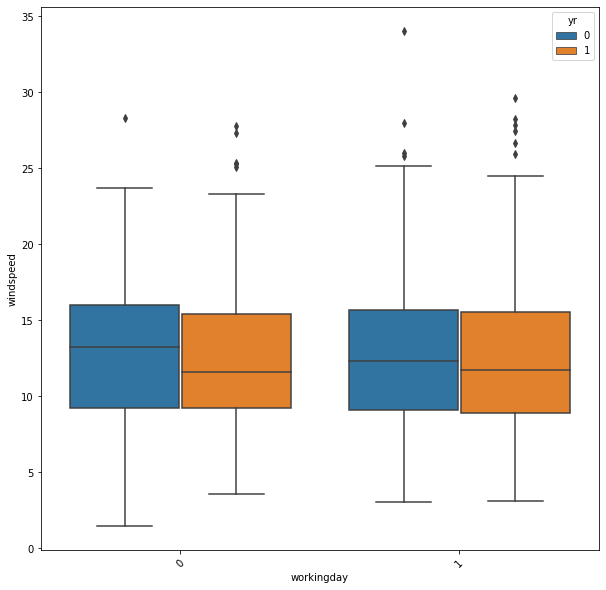

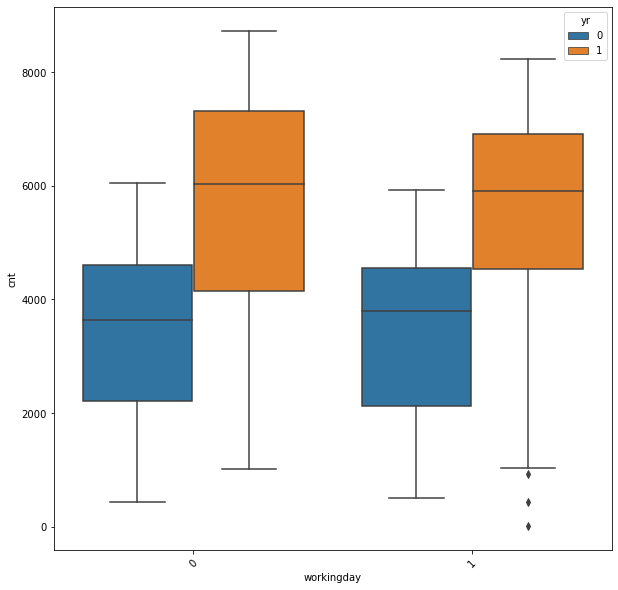

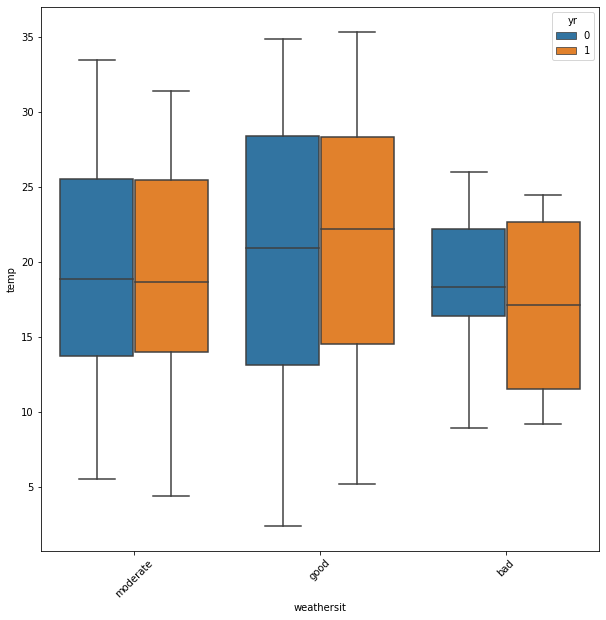

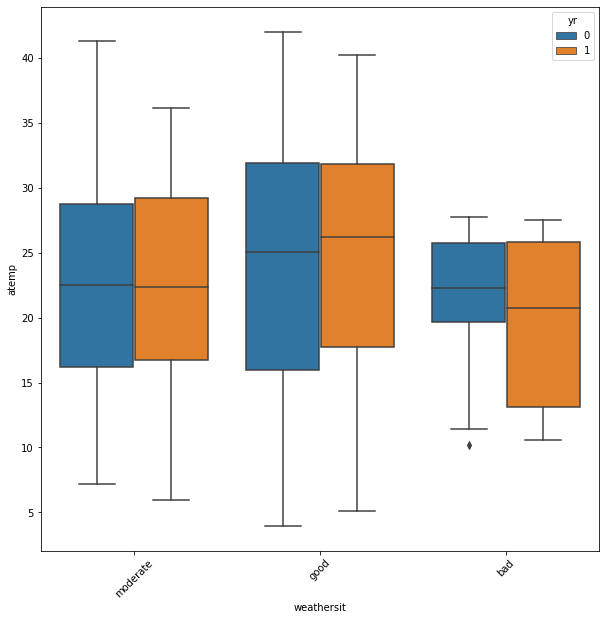

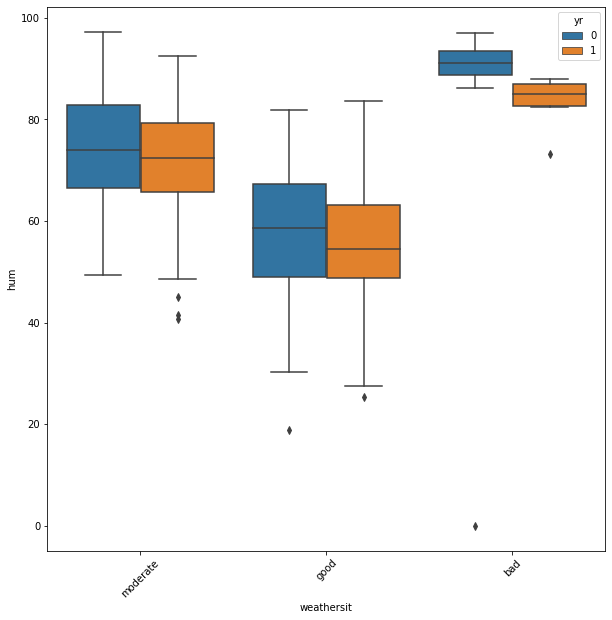

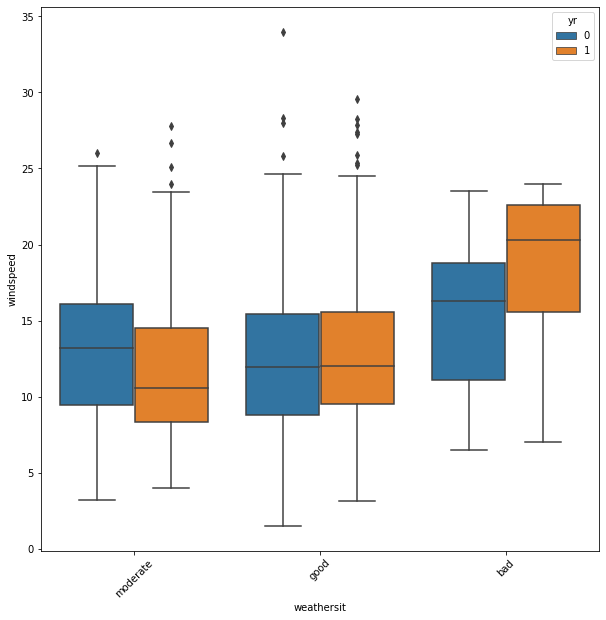

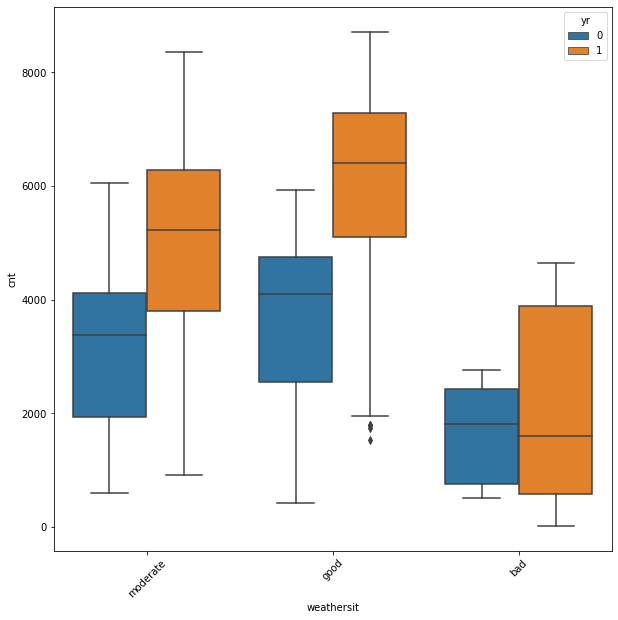

In [19]:
for x in bikes_categorical:
    for y in bikes_continous:
        plt.figure(figsize=([10,10]))
        sns.boxplot(data =bikes_new, x=x,y=y, hue ='yr',orient='v')
        plt.xlabel(x)
        plt.xticks(rotation=45)
        plt.show()
        

Insights:
- Highest demand for bike during fall.
- Count increased by next year 2019 hence demand will continously grow in next year.
- Demand is growing till Jun and gradually decreasing upcoming months.
- Demand is higher for Thursday,Friday, Saturday and Sunday.
- Demand is comparitively lesser than start of the week.
- Clear weathersit has highest demand.
- Due to weather conditions demand is getting decreased.
- Booking seems same as weekday and weekend.

#### Coorelation between variables

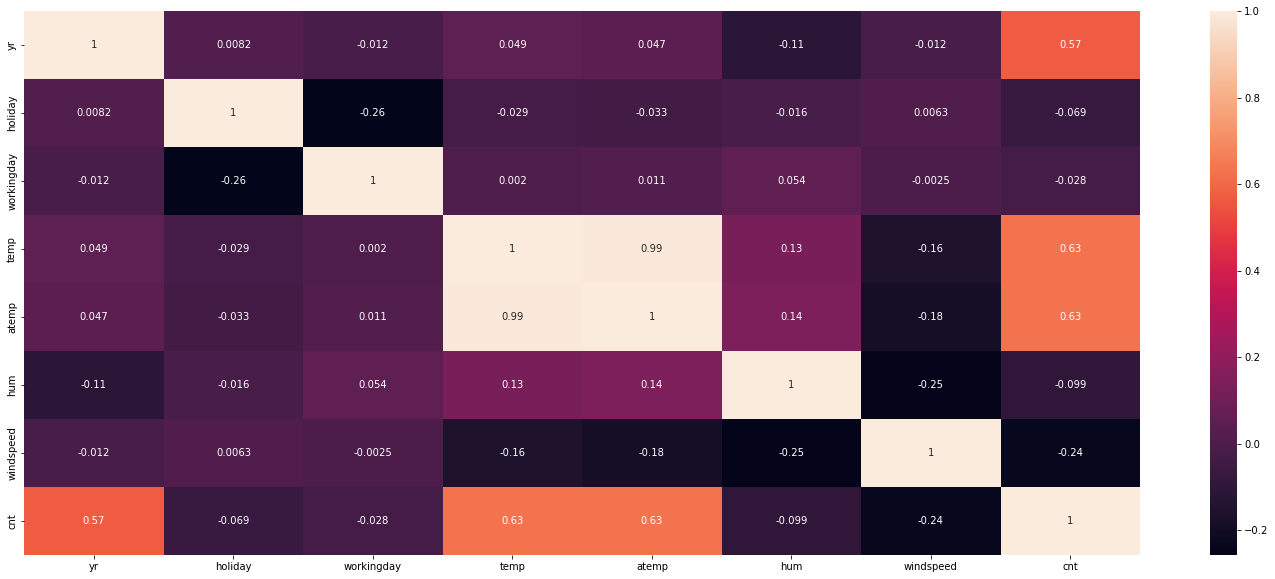

In [20]:
corr=bikes_new.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True)
plt.show()

Insights:
- Temp and atemp has highest correlation with target variable cnt.

# STEP 3: Preparing data for linear regression

In [21]:
# creating dummies for month, weekday, weathersit and season variables.
bikes_new=pd.get_dummies(data=bikes_new,columns=['season','mnth','weekday'],drop_first=True)
bikes_new=pd.get_dummies(data=bikes_new,columns=['weathersit'],drop_first=True)

In [22]:
bikes_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
bikes_new.shape

(730, 30)

In [24]:
bikes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    uint8  
 9   season_summer        730 non-null    uint8  
 10  season_winter        730 non-null    uint8  
 11  mnth_aug             730 non-null    uint8  
 12  mnth_dec             730 non-null    uint8  
 13  mnth_feb             730 non-null    uint8  
 14  mnth_jan             730 non-null    uint8  
 15  mnth_jul             730 non-null    uin

In [25]:
bikes_new.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.634247,0.336986
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.481971,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# STEP 4: SPLITING DATA INTO TRAINING AND TEST SETS

In [26]:
#Spliting data for training and test data set
X_train, y_test = train_test_split(bikes_new, train_size = 0.7, random_state = 100)


In [27]:
#Printing shape of test and train data set
print(X_train.shape)
print(y_test.shape)

(510, 30)
(220, 30)


## Rescaling Features

In [28]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [29]:
#apply scaler to all the columns except 'yes-no' and dummy variables
X_train[bikes_continous] = scaler.fit_transform(X_train[bikes_continous])

In [30]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.625490,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


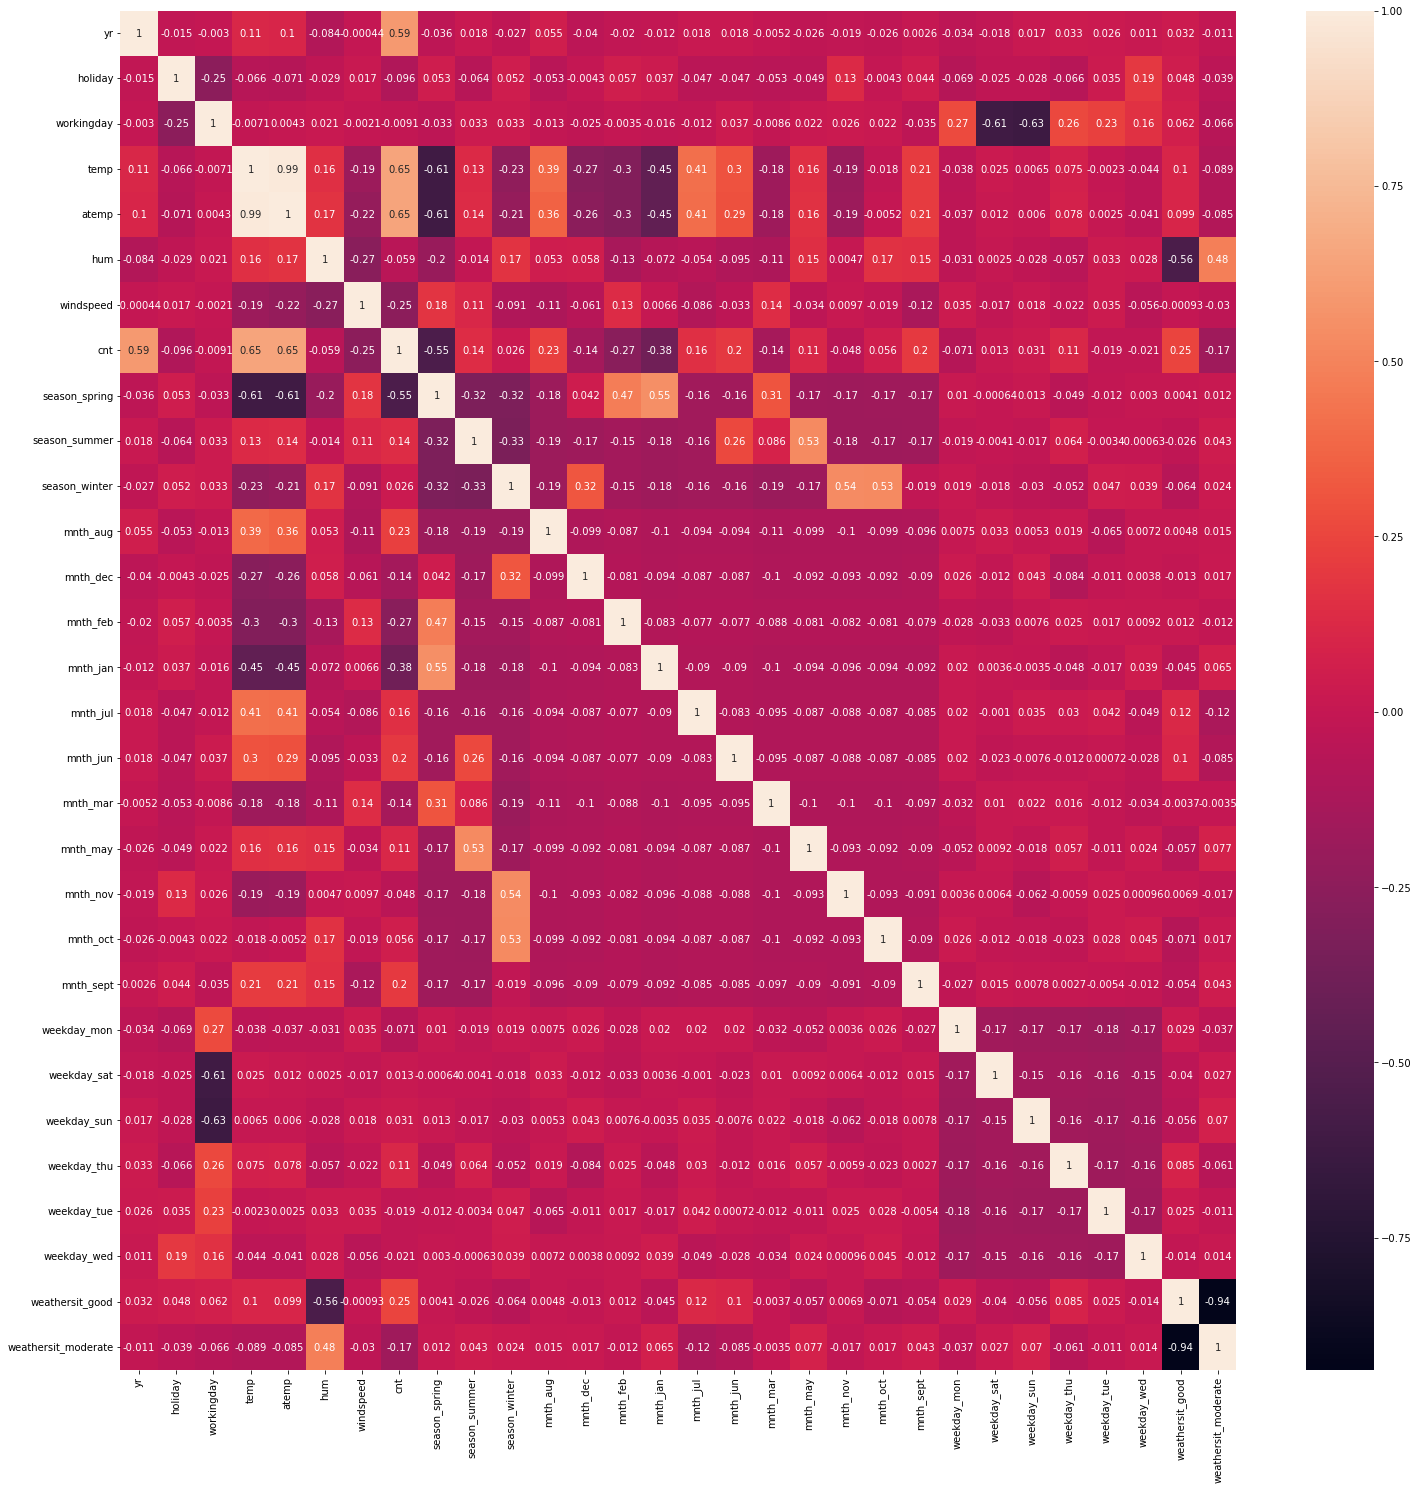

In [32]:
#checking the variables which are highly correlated.
plt.figure(figsize=(25,25))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

- cnt seems to have correlation with year variable and temp. 
- Similarly, Misty and humidity show correlation. 
- Spring season with Jan and Feb month.
- Summer season with may month and Winter season with oct and nov month show good correlation.


### Building a model with RFE and automated approach

In [33]:
y_train=X_train.pop('cnt')
X_train=X_train

In [34]:
lm=LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [35]:
rfe=RFE(lm, n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [36]:
#columns to be selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 9),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 11),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [37]:
#selecting the selected variable via RFE
col = X_train.columns[rfe.support_]

print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sept', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')


In [38]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]


Index(['workingday', 'atemp', 'mnth_aug', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [39]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 


In [40]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]


In [41]:
# calculate VIF

calculateVIF(X_train_rfe)


,Features,VIF
3,hum,26.33
2,temp,25.12
13,weathersit_good,15.65
14,weathersit_moderate,9.30
5,season_spring,5.75
4,windspeed,4.67
7,season_winter,4.53
6,season_summer,3.30
0,yr,2.10
11,mnth_nov,1.91


# STEP 5: BUILDING A MODEL

In [42]:
# Building Model 1
X_train_lm_1=sm.add_constant(X_train_rfe)
lr_1=sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          8.15e-189
Time:                        12:19:51   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0732    

In [43]:
# Humidity has highest VIF value hence we drop it
X_train_new=X_train_rfe.drop(['hum'],axis=1)
                             

In [44]:
#calculate vif
calculateVIF(X_train_new)

,Features,VIF
12,weathersit_good,15.65
2,temp,14.02
13,weathersit_moderate,8.82
3,windspeed,4.66
4,season_spring,4.41
6,season_winter,3.36
5,season_summer,2.78
0,yr,2.08
10,mnth_nov,1.89
8,mnth_jan,1.74


In [45]:
# Building model 2
X_train_lm_2=sm.add_constant(X_train_new)
lr_2=sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          4.75e-186
Time:                        12:19:51   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0467    

In [46]:
#calculate vif
calculateVIF(X_train_new)

,Features,VIF
12,weathersit_good,15.65
2,temp,14.02
13,weathersit_moderate,8.82
3,windspeed,4.66
4,season_spring,4.41
6,season_winter,3.36
5,season_summer,2.78
0,yr,2.08
10,mnth_nov,1.89
8,mnth_jan,1.74


In [47]:
# Nov have highest p value we can drop it
X_train_new=X_train_new.drop(['mnth_nov'],axis=1)


In [48]:
# Building model 3
X_train_lm_3=sm.add_constant(X_train_new)
lr_3=sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          2.74e-186
Time:                        12:19:51   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0596    

In [49]:
#calculate vif
calculateVIF(X_train_new)

,Features,VIF
11,weathersit_good,14.97
2,temp,13.41
12,weathersit_moderate,8.50
3,windspeed,4.63
4,season_spring,4.35
6,season_winter,2.76
5,season_summer,2.74
0,yr,2.08
8,mnth_jan,1.72
9,mnth_jul,1.60


In [50]:
# Weathersit _good had high VIF value we can drop it
X_train_new=X_train_new.drop(['weathersit_good'],axis=1)

In [51]:
# Building model 4
X_train_lm_4=sm.add_constant(X_train_new)
lr_4=sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     158.8
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          2.28e-161
Time:                        12:19:51   Log-Likelihood:                 440.73
No. Observations:                 510   AIC:                            -855.5
Df Residuals:                     497   BIC:                            -800.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2090    

In [52]:
#calculate vif
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.56
4,season_spring,2.89
5,season_summer,2.24
0,yr,2.07
6,season_winter,2.02
8,mnth_jan,1.65
9,mnth_jul,1.59
11,weathersit_moderate,1.54
10,mnth_sept,1.34


In [53]:
# Dec has highest p value we can drop it
X_train_new=X_train_new.drop(['mnth_dec'],axis=1)

In [54]:
# Building model 5
X_train_lm_5=sm.add_constant(X_train_new)
lr_5=sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     173.2
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          2.65e-162
Time:                        12:19:51   Log-Likelihood:                 440.27
No. Observations:                 510   AIC:                            -856.5
Df Residuals:                     498   BIC:                            -805.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2010    

In [55]:
#calculate vif
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.56
4,season_spring,2.75
5,season_summer,2.24
0,yr,2.07
6,season_winter,1.76
7,mnth_jan,1.61
8,mnth_jul,1.59
10,weathersit_moderate,1.54
9,mnth_sept,1.33


In [56]:
# Jan has highest p value we can drop it
X_train_new=X_train_new.drop(['mnth_jan'],axis=1)

In [57]:
# Building model 6
X_train_lm_6=sm.add_constant(X_train_new)
lr_6=sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          7.37e-163
Time:                        12:19:51   Log-Likelihood:                 438.86
No. Observations:                 510   AIC:                            -855.7
Df Residuals:                     499   BIC:                            -809.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1871    

In [58]:
#calculate vif
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.54
5,season_summer,2.23
4,season_spring,2.08
0,yr,2.06
6,season_winter,1.75
7,mnth_jul,1.58
9,weathersit_moderate,1.53
8,mnth_sept,1.33
1,holiday,1.04


In [59]:
#Spring has highest p value we can drop it
X_train_new=X_train_new.drop(['season_spring'],axis=1)

In [60]:
# Building model 7
X_train_lm_7=sm.add_constant(X_train_new)
lr_7=sm.OLS(y_train,X_train_lm_7).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     207.7
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          1.16e-162
Time:                        12:19:52   Log-Likelihood:                 435.63
No. Observations:                 510   AIC:                            -851.3
Df Residuals:                     500   BIC:                            -808.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1180    

In [61]:
#calculate vif
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.06
3,windspeed,3.03
0,yr,2.00
4,season_summer,1.76
6,mnth_jul,1.52
8,weathersit_moderate,1.47
5,season_winter,1.43
7,mnth_sept,1.28
1,holiday,1.03


In [62]:
# Jul has highest p value we can drop it
X_train_new=X_train_new.drop(['mnth_jul'],axis=1)

In [63]:
# Building model 8
X_train_lm_8=sm.add_constant(X_train_new)
lr_8=sm.OLS(y_train,X_train_lm_8).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     231.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          7.07e-163
Time:                        12:19:52   Log-Likelihood:                 433.31
No. Observations:                 510   AIC:                            -848.6
Df Residuals:                     501   BIC:                            -810.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1223    

In [64]:
#calculate vif
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.68
3,windspeed,2.99
0,yr,1.99
4,season_summer,1.57
7,weathersit_moderate,1.46
5,season_winter,1.35
6,mnth_sept,1.20
1,holiday,1.03


- We can consider linear model 8 since p values are almost zero meant that model is significant
- F statistics is 231.5 
- No multicollinearity (highest VIF) and no high p value to be removed


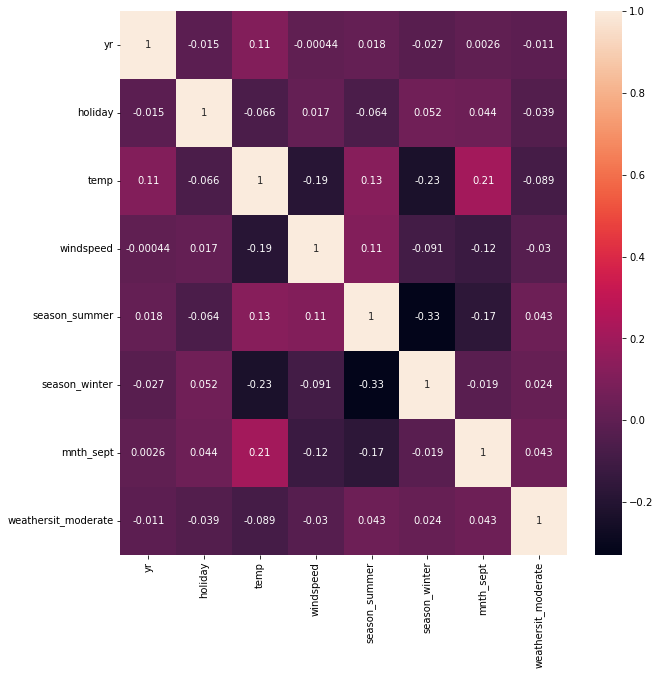

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train_new.corr(),annot=True)
plt.show()

In [66]:
# checking coefficient values and parameters
lr_8.params

const                  0.122344
yr                     0.238475
holiday               -0.084856
temp                   0.549679
windspeed             -0.181655
season_summer          0.088128
season_winter          0.115191
mnth_sept              0.090997
weathersit_moderate   -0.065098
dtype: float64

# STEP 7: RESIDUAL ANALYSIS OF TRAINING DATA AND VALIDATION


In [67]:
X_train_lm_8

,const,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_sept,weathersit_moderate
576,1.0,1,0,0.815169,0.264686,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1
728,1.0,1,0,0.245101,0.663106,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,1
111,1.0,0,0,0.345824,0.380981,1,0,0,1
...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,1
79,1.0,0,0,0.462664,0.529881,1,0,0,1


In [68]:
y_train_pred=lr_8.predict(X_train_lm_8)

### Normality of error terms

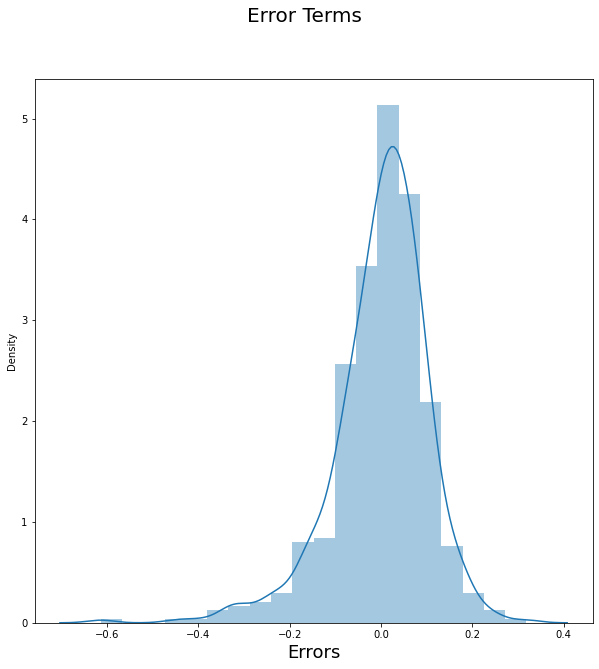

In [69]:
fig = plt.figure(figsize=(10,10))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly.


### Assumption of Error Terms Being Independent


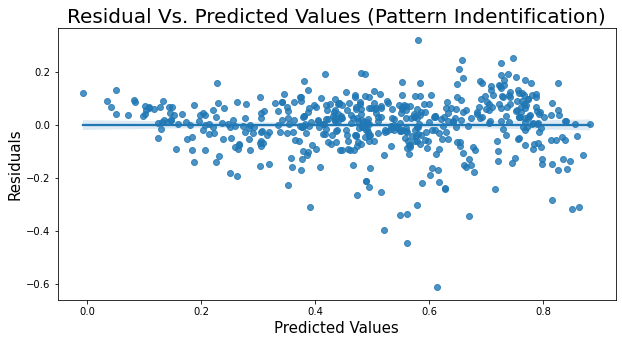

In [70]:
plt.figure(figsize=(10,5))
sns.regplot(x=y_train_pred, y=(y_train - y_train_pred))
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

From the above graph, we see that there is almost no relation between Residual & Predicted Value. This is what we had expected from our model to have no specific pattern.


### Homoscedasticity

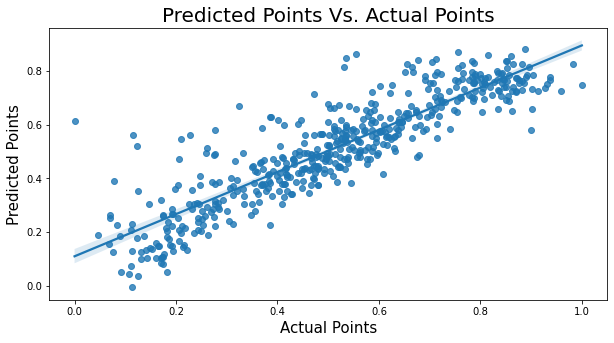

In [71]:
plt.figure(figsize=(10,5))
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()


From the above graph, we can say that residuals are equal distributed across predicted value.
This means we see equal variance and we do NOT observe high concentration of data points in certain region & low concentraion in certain regions.

#### Independence of residuals
- Durbin-Watson value of final model lr_8 is 2.077, which signifies there is no autocorrelation.



In [72]:
#Print R-squared Value
r2_score(y_train,y_train_pred)


0.7870537940791509

### Multi Colinearity


In [73]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.68
3,windspeed,2.99
0,yr,1.99
4,season_summer,1.57
7,weathersit_moderate,1.46
5,season_winter,1.35
6,mnth_sept,1.20
1,holiday,1.03


# STEP 8: MAKING PREDICTION USING FINAL MODEL

In [74]:
y_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,1,0,0,1,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,1,0,0,0,0,1,0


In [75]:
# Predict values for test data
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','cnt']

#Test data to be transformed only, no fitting
y_test[num_vars] = scaler.transform(y_test[num_vars])
y_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,1,0


In [76]:
y_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.654545,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.476601,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
y1_test=y_test.pop('cnt')
X1_test=y_test

In [78]:
col1 = X_train_new.columns

X1_test = X1_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X1_test)


In [79]:
y_pred = lr_8.predict(X_test_lm_6)

In [80]:
r2 = r2_score(y1_test, y_pred)
round(r2,4)


0.7689

# STEP 9: MODEL EVALUATION

#### Let's now plot the graph for actual versus predicted values.



Text(0, 0.5, 'y_pred')

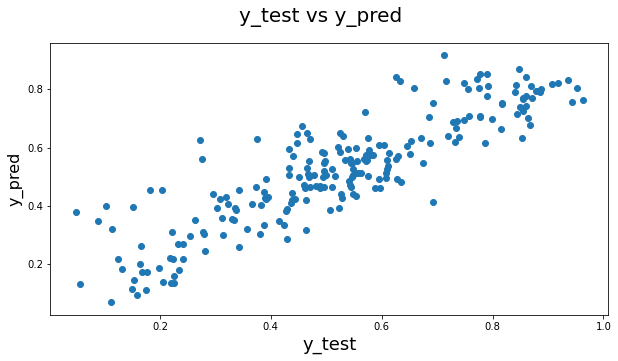

In [81]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(10,5))
plt.scatter(y1_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 


In [82]:
round(lr_8.params,4)

const                  0.1223
yr                     0.2385
holiday               -0.0849
temp                   0.5497
windspeed             -0.1817
season_summer          0.0881
season_winter          0.1152
mnth_sept              0.0910
weathersit_moderate   -0.0651
dtype: float64

Equation for best fitted line:
- cnt= 0.1223+0.2385 x yr-0.0849 x holiday+0.5497 x temp-0.1817 x windspeed-0.1817 x season_summer+0.0881 x season_winter+0.1152 x mnth_sept+0.0910 x weathersit_moderate-0.0651

In [83]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X1_test.shape[0]-1)/(X1_test.shape[0]-X1_test.shape[1]-1),4)
print(adjusted_r2)


0.7601


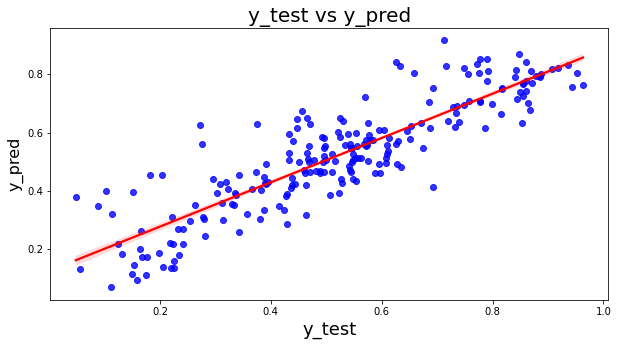

In [84]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure(figsize=(10,5))
sns.regplot(x=y1_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()


## FINAL RESULT COMPARISON

- Train R^2 :0.787
- Train Adjusted R^2 :0.784
- Test R^2 :0.7689
- Test Adjusted R^2 :0.7601
- This seems to be a really good model that can very well 'Generalize' various datasets.

# CONCLUSION

Significant variables to predict the demand for shared bikes
- year
- holiday
- temp
- windspeed
- season_summer
- season_winter
- mnth_sept
- weathersit_moderate